<a href="https://colab.research.google.com/github/ayyaz-azeem/NLP_urdu_sentiment_analysis/blob/main/urdu_nlp_project01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install urduhack

In [ ]:
import urduhack

In [ ]:
# Downloading models
urduhack.download()

98304/89078 [=================================] - 0s 0us/step


In [ ]:
import numpy as np # deal arrays
import pandas as pd # upload file
import nltk # natural language processing, sentences, tokenize, stemming, lematization,parragraph->sentence->word
import matplotlib.pyplot as plt# for visualization
import re
from sklearn.feature_extraction.text import CountVectorizer # for bag of words

from sklearn.feature_extraction import text
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pwd

/content


In [ ]:
#importing dataset by using Padndas libbrary
#urdu_doc = pd.read_excel("D:/coding/python/urduproj1/urduReviewSentence.xlsx")# , encoding = 'utf8')
urdu_doc = pd.read_excel("./urduReviewSentence.xlsx")# , encoding = 'utf8') #76 kb file
urdu_doc.shape

(1168, 2)

In [ ]:
urdu_doc = urdu_doc.dropna()
urdu_doc.shape

(1168, 2)

In [ ]:
urdu_doc.head(10)

,Sentences,Labels
0,یہ بہت خوشی کی بات ہے کہ وہ کراچی آئے ہیں ک...,1
1,یہ محض مودی کو خوش کرنے کے لیے کیا گیا,1
2,ان کا کہنا تھا کہ وہ نریندر مودی کے اس فیصلے ...,1
3,کیا وہ بھی اس خوشی میں شامل ہوں گے,1
4,تاہم خوش قسمتی سے اب تک یہ احتجاج یا انقلاب پ...,1
5,وہ مزید کہتے ہیں شاہ رخ کے زیادہ تر کردار متو...,1
6,شاہ رخ خان کے کردار کی زندگی خوش و خرم ہے بس ...,1
7,میں بہت خوش اور پرجوش محسوس کر رہا ہوں,1
8,مجھے خوشی ہے کہ اس نے یہ ذمہ داری قبول کر لی ہے,1
9,ایک نئی تحقیق سے معلوم ہوا ہے کہ آمدن دگنی ہو...,1


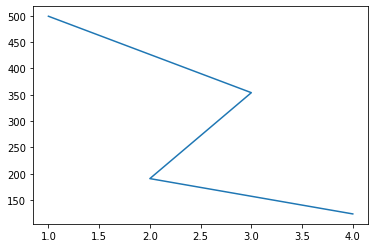

In [ ]:
plt.plot(urdu_doc['Labels'].value_counts())

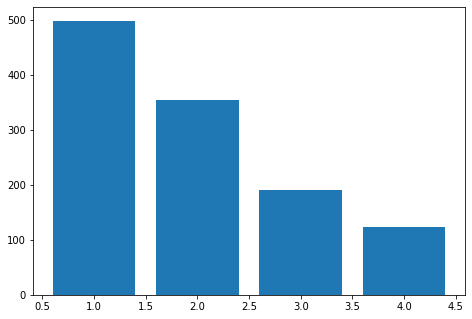

In [ ]:
#plt.bar(urdu_doc['Labels'].value_counts())
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis = [1.0,2.0,3.0,4.0]
ax.bar(x_axis,urdu_doc['Labels'].value_counts())
plt.show()

In [ ]:
urdu_doc['Labels'].value_counts()

1    499
3    354
2    191
4    124
Name: Labels, dtype: int64

In [ ]:
from platform import python_version

print(python_version())

3.7.13


In [ ]:
# Removing unwanted characters, stopwords, and format the text to create fewer nulls word embeddings

def removing_unwanted_data(text):

  #Format words and remove unwanted characters
  text = re.sub(r'https?:\/\/.*[\r\n]*','',text, flags = re.MULTILINE)
  text = re.sub(r'\<a href', ' ', text)
  text = re.sub(r'&amp;', '', text)
  text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
  text = re.sub(r'<br />', ' ', text)
  text = re.sub(r'\'', ' ', text)

  # tokenize each word
  text = nltk.WordPunctTokenizer().tokenize(text)

  return text


In [ ]:
urdu_doc['text_cleaned'] = list(map(removing_unwanted_data,urdu_doc.Sentences))
urdu_doc.head()

,Sentences,Labels,text_cleaned
0,یہ بہت خوشی کی بات ہے کہ وہ کراچی آئے ہیں ک...,1,"[یہ, بہت, خوشی, کی, بات, ہے, کہ, وہ, کراچی, آئ..."
1,یہ محض مودی کو خوش کرنے کے لیے کیا گیا,1,"[یہ, محض, مودی, کو, خوش, کرنے, کے, لیے, کیا, گیا]"
2,ان کا کہنا تھا کہ وہ نریندر مودی کے اس فیصلے ...,1,"[ان, کا, کہنا, تھا, کہ, وہ, نریندر, مودی, کے, ..."
3,کیا وہ بھی اس خوشی میں شامل ہوں گے,1,"[کیا, وہ, بھی, اس, خوشی, میں, شامل, ہوں, گے]"
4,تاہم خوش قسمتی سے اب تک یہ احتجاج یا انقلاب پ...,1,"[تاہم, خوش, قسمتی, سے, اب, تک, یہ, احتجاج, یا,..."


**Lemmatization**

Get lemma of the word from lookup table

Args: 
*   text(str): Urdu tokeized text
*   lookup path (str): path to lookup

Returns:
*   list: A list containing tuples of word and its lemma



In [ ]:
import json

from urduhack.config import LEMMA_LOOKUP_TABLE_PATH

_WORD2LEMMA = None


def lemma_lookup(text, lookup_path: str = LEMMA_LOOKUP_TABLE_PATH) -> list:
    tokens = text
    global _WORD2LEMMA
    if _WORD2LEMMA is None:
        with open(lookup_path, "r", encoding="utf-8") as file:
            _WORD2LEMMA = json.load(file)

    return [_WORD2LEMMA[word] if word in _WORD2LEMMA else word for word in tokens] # list comprehension


In [ ]:
urdu_doc['Lemmatized'] = list(map(lemma_lookup,urdu_doc.text_cleaned))
urdu_doc.head()

,Sentences,Labels,text_cleaned,Lemmatized
0,یہ بہت خوشی کی بات ہے کہ وہ کراچی آئے ہیں ک...,1,"[یہ, بہت, خوشی, کی, بات, ہے, کہ, وہ, کراچی, آئ...","[میں, بہت, خوشی, کم, بات, ہونا, کہنا, میں, کرا..."
1,یہ محض مودی کو خوش کرنے کے لیے کیا گیا,1,"[یہ, محض, مودی, کو, خوش, کرنے, کے, لیے, کیا, گیا]","[میں, محض, مودی, کو, خوش, کرنا, کم, لینا, کیا,..."
2,ان کا کہنا تھا کہ وہ نریندر مودی کے اس فیصلے ...,1,"[ان, کا, کہنا, تھا, کہ, وہ, نریندر, مودی, کے, ...","[میں, کا, کہنا, تھا, کہنا, میں, نریندر, مودی, ..."
3,کیا وہ بھی اس خوشی میں شامل ہوں گے,1,"[کیا, وہ, بھی, اس, خوشی, میں, شامل, ہوں, گے]","[کیا, میں, بھی, میں, خوشی, میں, شامل, ہونا, گے]"
4,تاہم خوش قسمتی سے اب تک یہ احتجاج یا انقلاب پ...,1,"[تاہم, خوش, قسمتی, سے, اب, تک, یہ, احتجاج, یا,...","[تاہم, خوش, قسمتی, سے, اب, تکنا, میں, احتجاج, ..."



**Feature Engineering**

Since machine learning models do not accept the raw text as input data, we need to convert “Reviews” into vectors of numbers.
There are different ways of transforming text into numeric vectors.
In this analysis, I’ve applied first Bag of Words, followed by Bag-of-n-Grams, and later I’ve moved to Tf-Idf which is a more complex representation.
I’ve aimed to model two different classification by using these methodologies and compare their performances on Amazon’s dataset.

**Bag of word (BOW)**

It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.


In [ ]:
BOW_convert = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
x = BOW_convert.fit_transform(urdu_doc['Lemmatized'])

words = BOW_convert.get_feature_names()
print("The total number of columns are =",len(words))
print('Shape of arrays =',x.toarray().shape)

The total number of columns are = 3479
Shape of arrays = (1168, 3479)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)




Since bag-of-words representation converts text into a “flat vector of numbers”, it does not remember any original textual sequence and it can destroy the semantic meaning of the text.
In other words, it only records how many times each word appears in the text and it does not give any importance to their order. Each word count becomes a dimension for that specific word.


In [ ]:
import sklearn.model_selection

from sklearn.linear_model import LogisticRegression

train,test= sklearn.model_selection.train_test_split(urdu_doc, train_size = 0.8, random_state=42)

print('Training data set shape =',train.shape)

print('Testing data set shape =',test.shape)

Training data set shape = (934, 4)
Testing data set shape = (234, 4)



**BOW Transformation**

Converting the training and testing data into BOW array


In [ ]:
BOW_convert = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)

X_train = BOW_convert.fit_transform(train['Lemmatized']) 

X_test=BOW_convert.transform(test['Lemmatized'])

y_train=train['Labels']
y_test=test['Labels']
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(934, 3097)
(934,)
(234, 3097)
(234,)


In [ ]:
urdu_doc.shape

(1168, 4)

**Tf-Idf Tranformation**

In [ ]:
tfidf_transform = text.TfidfTransformer(norm=None)

X_train_tfidf = tfidf_transform.fit_transform(X_train)

In [ ]:
X_test_tfidf = tfidf_transform.transform(X_test)

**Logistic Regression**

In [ ]:
score=[]
name=[]
def logistic_regression(X_tr, y_tr, X_te, y_te, description):
    model = LogisticRegression().fit(X_tr, y_tr)
    s = model.score(X_te, y_te)
    score.append(s)
    name.append(description)
    print('Testing Score with', description, 'features', score)
    return s

In [ ]:
accuracy_bow_method=logistic_regression(X_train,y_train,X_test,y_test,"LDA-BOW")
accuracy_tf_if=logistic_regression(X_train_tfidf,y_train,X_test_tfidf,y_test,"LDA-TFID")

Testing Score with LDA-BOW features [0.9188034188034188]
Testing Score with LDA-TFID features [0.9188034188034188, 0.9230769230769231]


**SVM with BOW**

In [ ]:
from sklearn import svm
clf = svm.SVC()

clf.fit(X_train, y_train)

ss=clf.score(X_test,y_test)
score.append(ss)
name.append('SVM-BOW')

# get the accuracy
print('Testing Score of SVM with BOW method ', score)

Testing Score of SVM with BOW method  [0.9188034188034188, 0.9230769230769231, 0.9102564102564102]


**Comparing all model results**

In [ ]:
results=pd.DataFrame()
dictionary=dict()
dictionary['Models']=name
dictionary['Accuracy']=score
results=pd.DataFrame(dictionary )

results

,Models,Accuracy
0,LDA-BOW,0.918803
1,LDA-TFID,0.923077
2,SVM-BOW,0.910256


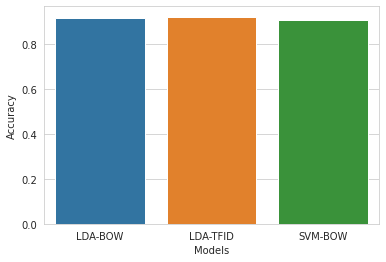

In [ ]:
import seaborn as sns
sns.set_style(style="whitegrid")

ax = sns.barplot(x='Models', y= 'Accuracy',data=results)